In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
# Load image
import skimage.io
from skimage.transform import resize
import math

In [5]:
path = '../train/000c99ba-bba4-11e8-b2b9-ac1f6b6435d0'
image_red_ch = skimage.io.imread(path+'_red.png')
image_yellow_ch = skimage.io.imread(path+'_yellow.png')
image_green_ch = skimage.io.imread(path+'_green.png')
image_blue_ch = skimage.io.imread(path+'_blue.png')

In [6]:
image_red_ch

array([[ 0,  0,  0, ..., 11, 12,  0],
       [ 0,  0,  0, ...,  6, 42, 13],
       [ 0,  0,  0, ..., 28,  4,  2],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [16]:
image = np.stack((
            image_red_ch, 
            image_yellow_ch, 
            image_green_ch, 
            image_blue_ch), -1)
image = image / 255

In [9]:
image.shape

(512, 512, 4)

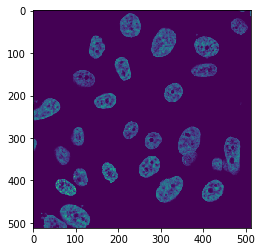

In [45]:
g = plt.imshow(image_blue_ch / 255)

In [21]:
X_train = image.reshape(-1,512,512,4)

In [25]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)



In [27]:
result = next(datagen.flow(X_train))

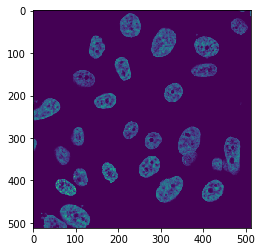

In [48]:
# Before rotate
g = plt.imshow(image_blue_ch / 255)

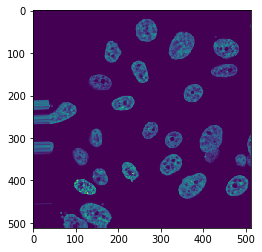

In [49]:
# After rotate
g2 = plt.imshow(result[0][:,:,3])

In [40]:
result[0][:,:,0].shape

(512, 512)

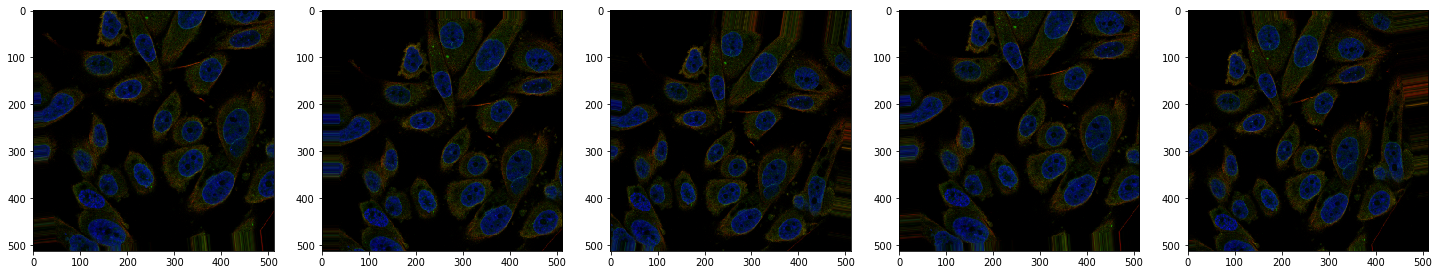

In [55]:
images = next(datagen.flow(X_train))

fig, ax = plt.subplots(1,5,figsize=(25,5))
for i in range(5):
    images = next(datagen.flow(X_train))
    image_red_ch = images[0][:,:,0]/2 + (images[0][:,:,1]/2)
    image_green_ch = images[0][:,:,2]/2 + (images[0][:,:,1]/2)
    image_blue_ch = images[0][:,:,3]

    image = np.stack((
        image_red_ch, 
        image_green_ch, 
        image_blue_ch), -1)
    ax[i].imshow(image)

In [57]:
fig.savefig('books_read.png')